## Observations and Insights 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice = mouse_study_df['Mouse ID'].nunique()
number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicated_mice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

data_duplicated_mice =  mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID','Timepoint'])]
data_duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df_clean=mouse_study_df[mouse_study_df['Mouse ID'].isin(duplicated_mice) == False]


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice_2 = len(mouse_study_df_clean['Mouse ID'].unique())
number_mice_2

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_mice = mouse_study_df_clean.groupby(['Drug Regimen'])
mean_gm = grouped_mice['Tumor Volume (mm3)'].mean()
median_gm = grouped_mice['Tumor Volume (mm3)'].median()
variance_gm = grouped_mice['Tumor Volume (mm3)'].var()
std_gm = grouped_mice['Tumor Volume (mm3)'].std()
sem_gm = grouped_mice['Tumor Volume (mm3)'].sem()

summary = pd.DataFrame({
    'Mean':mean_gm,
    'Median':median_gm,
    'Variance':variance_gm,
    'Standard Deviation':std_gm,
    'SEM':sem_gm
})
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
grouped_mice = mouse_study_df_clean.groupby(['Drug Regimen'])
summary_2 = grouped_mice.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_2



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

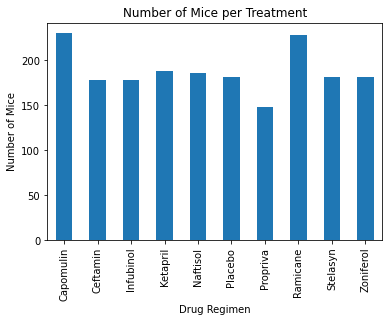

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_mice = mouse_study_df_clean.groupby(["Drug Regimen"]).count()["Mouse ID"] 

plot_pandas = count_mice.plot.bar()


plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")


plt.show()



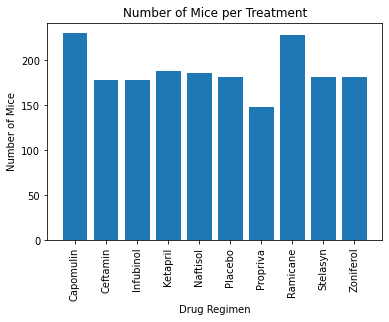

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(count_mice))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")


plt.bar(x_axis, count_mice)
plt.xticks(tick_locations, x_axis)
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.show()


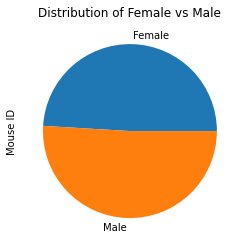

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count_mice_sex = mouse_study_df_clean.groupby(["Sex"]).count()["Mouse ID"] 
plot_pandas = count_mice_sex.plot.pie()
plt.title("Distribution of Female vs Male")
plt.show()


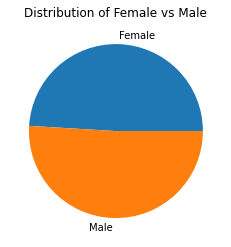

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_axis = np.arange(len(count_mice_sex))
labels = ["Female", "Male"]
plt.title("Distribution of Female vs Male")
plt.pie(count_mice_sex, labels=labels)
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp =pd.DataFrame(mouse_study_df_clean.groupby('Mouse ID')['Timepoint'].max()).rename(columns={'Timepoint': 'max_timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_df = pd.merge(last_tp, mouse_study_df_clean, on=['Mouse ID'])
last_tumor_volume = merge_df['Tumor Volume (mm3)']
merge_df


,Mouse ID,max_timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,0,45.000000,0
1,a203,45,Infubinol,Female,20,23,5,48.508468,0
2,a203,45,Infubinol,Female,20,23,10,51.852437,1
3,a203,45,Infubinol,Female,20,23,15,52.777870,1
4,a203,45,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...,...
1875,z969,45,Naftisol,Male,9,30,25,63.145652,2
1876,z969,45,Naftisol,Male,9,30,30,65.841013,3
1877,z969,45,Naftisol,Male,9,30,35,69.176246,4
1878,z969,45,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []   


for treatment in treatments:
    
    T_df = merge_df.loc[merge_df['Drug Regimen'] == treatment]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    final_volume_df = T_df.loc[T_df['Timepoint'] == T_df['max_timepoint']]
    values = final_volume_df['Tumor Volume (mm3)']
    tumor_vol_data.append(values)
    
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {treatment}: {iqr}')
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes_df = T_df.loc[merge_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999


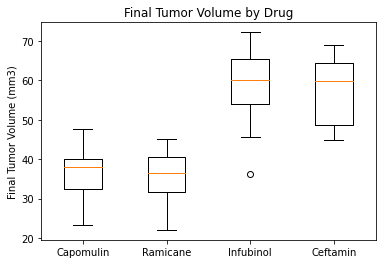

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_vol_data)
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Tumor Volume')

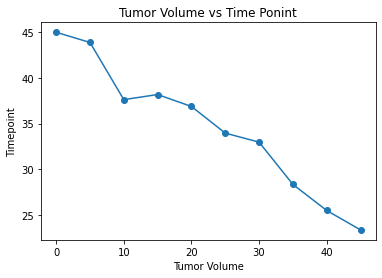

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_df = mouse_study_df_clean.loc[mouse_study_df_clean['Drug Regimen'] == 'Capomulin',:]
mouse = Capomulin_df.loc[Capomulin_df['Mouse ID'] == 's185']
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')
plt.title('Tumor Volume vs Time Ponint')
plt.ylabel('Timepoint')
plt.xlabel('Tumor Volume')
 

Text(0.5, 0, 'Mouse Weight')

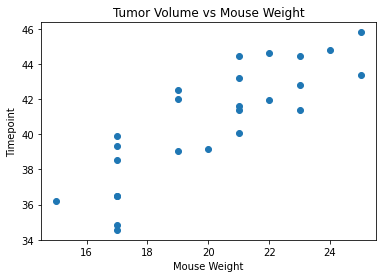

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_tumor_vol = Capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'])
plt.title('Tumor Volume vs Mouse Weight')
plt.ylabel('Timepoint')
plt.xlabel('Mouse Weight')

## Correlation and Regression

The r-squared is: 0.2763600223455911


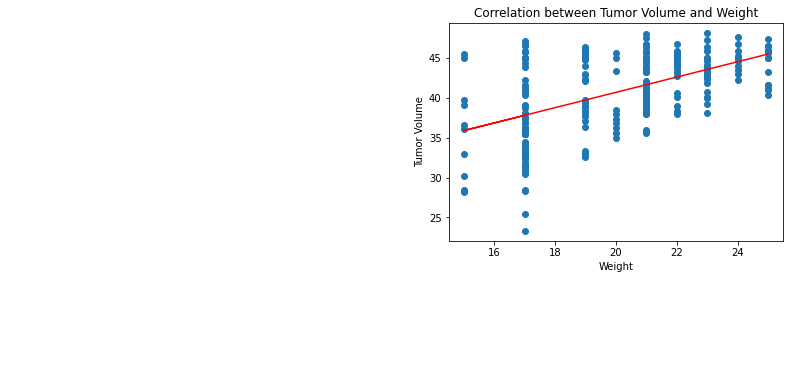

In [34]:
x_values = Capomulin_df['Weight (g)']
y_values =Capomulin_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
plt.title('Correlation between Tumor Volume and Weight')
plt.show()